In [1]:
.libPaths('/home/garret/anaconda3/envs/Mon/lib/R/library')
.libPaths()

[1] "/home/garret/anaconda3/envs/Mon/lib/R/library"
[2] "/home/garret/anaconda3/envs/HR/lib/R/library"

In [15]:
packageVersion("monocle3")
rm(list = ls())  # Clear the environment
options(warn=-1) # Turn off warning message globally
library("monocle3") # Load Monocle
library("Biobase")
library("Seurat")
library("ggplot2")
library("xlsx")
library("scales")

[1] ‘0.2.3.0’


# subsetting cells and genes

In [35]:
bcc.integrated<-readRDS(file =  "/media/garret/New Volume/scRNAseq_data/Personalis/Tcell/bcc.integrated.rds")
DefaultAssay(bcc.integrated) <- "RNA"

new.ident <- c("Memory_Tcell","Naive_Tcell1","Th17cell","Treg1","Activated_Tcell1",
               "TFH","Activated_Tcell2","Activated_exhausted_Tcell","Effector_memory_Tcell","Treg2",
               "Exhausted_Tcell","Naive_Tcell2")
names(x = new.ident) <- levels(x =bcc.integrated)
bcc.integrated<- RenameIdents(object =bcc.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(bcc.integrated@assays$RNA@data[,which(Idents(object=bcc.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

CD8<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Personalis/Tcell/CD8_id.rds")
CD8.integrated<-subset(bcc.integrated,cells=CD8)

In [36]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(CD8.integrated@meta.data)[1]){
    celltype[i]<-new.ident[as.numeric(CD8.integrated@meta.data$integrated_snn_res.0.6[i])]
}
CD8.integrated@meta.data$celltype<-celltype

# make monocle object

In [7]:
GTF <- read.table(file='/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/features.tsv')
colnames(GTF)<-c("id","gene_short_name","gene_expression")
common<-intersect(GTF$gene_short_name,rownames(merge_all@assays$RNA@data))

ERROR: Error in rownames(merge_all@assays$RNA@data): object 'merge_all' not found


In [8]:
GTF

id,gene_short_name,gene_expression,NA
<fct>,<fct>,<fct>,<fct>
ENSMUSG00000051951,Xkr4,Gene,Expression
ENSMUSG00000089699,Gm1992,Gene,Expression
ENSMUSG00000102343,Gm37381,Gene,Expression
ENSMUSG00000025900,Rp1,Gene,Expression
ENSMUSG00000025902,Sox17,Gene,Expression
ENSMUSG00000104328,Gm37323,Gene,Expression
ENSMUSG00000033845,Mrpl15,Gene,Expression
ENSMUSG00000025903,Lypla1,Gene,Expression
ENSMUSG00000104217,Gm37988,Gene,Expression


In [14]:
unique_gene[!(unique_gene %in% common)]

character(0)

In [15]:
GTF<-GTF[GTF$gene_short_name %in% common, ]
merge_all@assays$RNA@counts<-merge_all@assays$RNA@counts[common, ]
GTF<-GTF[!duplicated(GTF$gene_short_name),]

In [16]:
rownames(GTF)<-GTF$gene_short_name

In [43]:
#201029 Esr1_3 using dim 15
merge_all_m <-new_cell_data_set(as.matrix(CD8.integrated@assays$RNA@counts), cell_metadata =CD8.integrated@meta.data)
merge_all_m  <- preprocess_cds(merge_all_m ,  num_dim =10)
merge_all_m <- reduce_dimension(merge_all_m,reduction_method = "UMAP",preprocess_method = 'PCA')

In [44]:
merge_all_m  <- cluster_cells(merge_all_m )

In [45]:
merge_all_m <- learn_graph(merge_all_m,use_partition = FALSE)


  |======================================================================| 100%


In [47]:
cell_type_color <- c('Naive_Tcell1'= "#697A21",'Naive_Tcell2'= "#697A21","Activated_exhausted_Tcell"="#88A0B4","Activated_Tcell1" ="darkred","Activated_Tcell2" ="darkred","Memory_Tcell"= "salmon","Effector_memory_Tcell"= "salmon","Exhausted_Tcell"="darkblue")

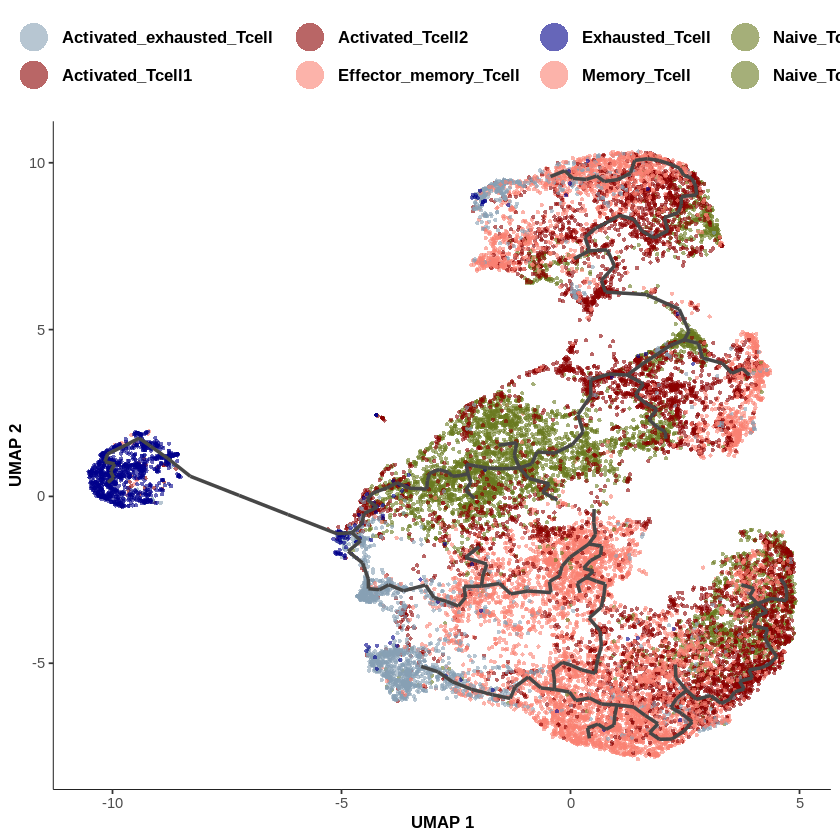

In [58]:
plot_cells(merge_all_m,
           color_cells_by = "celltype",cell_size =1.2,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 1,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = cell_type_color)+ guides(colour = guide_legend(override.aes = list(size=8)))+theme(title=element_text(size=10,angle=0,face="bold"),strip.text = element_text(size = 10,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 10,face="bold") ,legend.position ="top")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/Tcell/Trajectory_celltype.pdf",width=9,height=10)

In [51]:
get_earliest_principal_node <- function(merge_all_m, celltype="Naive_Tcell1"){
  cell_ids <- which(colData(merge_all_m)[, "celltype"] == celltype)
  
  closest_vertex <-
  merge_all_m@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(merge_all_m), ])
  root_pr_nodes <-
  igraph::V(principal_graph(merge_all_m)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}
merge_all_m<- order_cells(merge_all_m, root_pr_nodes=get_earliest_principal_node(merge_all_m))

In [52]:
get_earliest_principal_node(merge_all_m)

[1] "Y_84"

In [53]:
pseudotime<-numeric()
for (i in 1:length(merge_all_m@ principal_graph_aux$UMAP$pseudotime)){
    pseudotime[i]<-merge_all_m@ principal_graph_aux$UMAP$pseudotime[[i]]
}

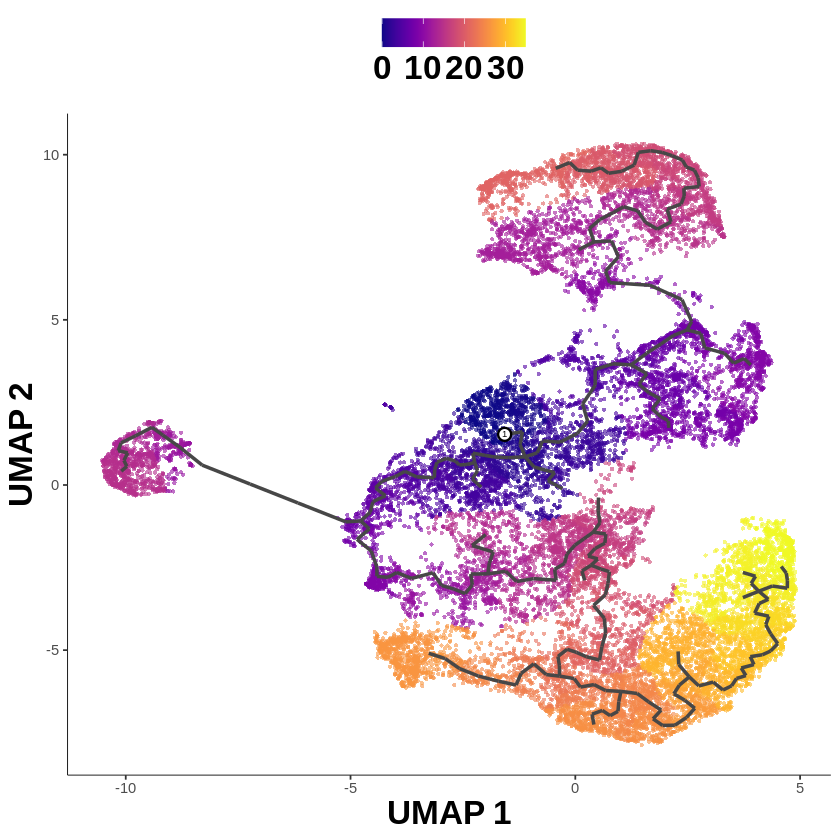

In [59]:
plot_cells(merge_all_m,
           color_cells_by = "pseudotime",cell_size =1.2,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 1,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 20,face="bold") ,legend.position ="top")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/Tcell/PT.pdf",width=9,height=10)

In [60]:
saveRDS(merge_all_m,file="/media/garret/New Volume/scRNAseq_data/Personalis/Tcell/merge_all_m.rds")